In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\cavba\Documents\Instacart Basket Analysis"

In [4]:
df= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merge.pkl'))

In [5]:
df.head()

,user_id,First Name,LastName,Gender,STATE,Age,date_joined,number_of_dependants,family_status,income,...,price_range_loc,busiest day,Result,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_order,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regular busy,busiest days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regular busy,regular days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regular busy,busiest days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regular busy,regular days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regular busy,slowest days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18339472 entries, 0 to 18339471
Data columns (total 35 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   First Name              object 
 2   LastName                object 
 3   Gender                  object 
 4   STATE                   object 
 5   Age                     int64  
 6   date_joined             object 
 7   number_of_dependants    int64  
 8   family_status           object 
 9   income                  int64  
 10  Unnamed: 0              int64  
 11  product_id              int64  
 12  product_name            object 
 13  aisle_id                int64  
 14  department_id           int64  
 15  prices                  float64
 16  order_id                int64  
 17  eval_set                object 
 18  order_number            int64  
 19  orders_day_of_the_week  int64  
 20  order_hour_of_day       int64  
 21  days_since_prior_order  float

In [7]:
df.isnull().sum()

user_id                         0
First Name                      0
LastName                        0
Gender                          0
STATE                           0
Age                             0
date_joined                     0
number_of_dependants            0
family_status                   0
income                          0
Unnamed: 0                      0
product_id                      0
product_name                    0
aisle_id                        0
department_id                   0
prices                          0
order_id                        0
eval_set                        0
order_number                    0
orders_day_of_the_week          0
order_hour_of_day               0
days_since_prior_order    1170531
add_to_cart_order               0
reordered                       0
_merge                          0
price_range_loc                 0
busiest day                     0
Result                          0
busiest_period_of_day           0
max_order     

In [8]:
df.shape

(18339472, 35)

## Histograms and bar charts

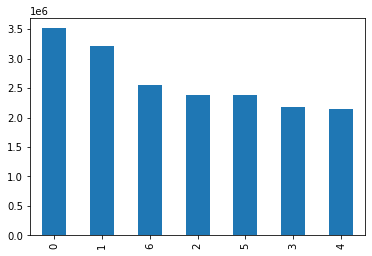

In [9]:
# Creating a bar chart
dow_bar = df['orders_day_of_the_week'].value_counts().plot.bar()

In [11]:
df['orders_day_of_the_week'].value_counts(dropna = False)

0    3513269
1    3207460
6    2544041
2    2383901
5    2378420
3    2172529
4    2139852
Name: orders_day_of_the_week, dtype: int64

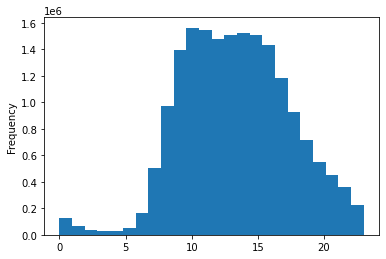

In [21]:
#Creatign histogram for order hours of the day 24 hours = 24 bins
hours_histogram = df['order_hour_of_day'].plot.hist(bins = 24)

Text(0.5, 0, 'hour or the day')

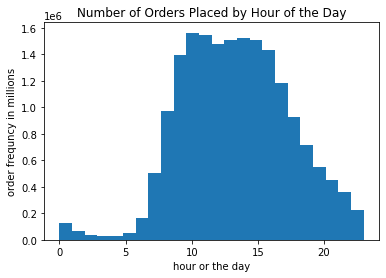

In [28]:
#formatting hours histogram
hours_histogram2 = df['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Number of Orders Placed by Hour of the Day')
plt.ylabel('order frequncy in millions')
plt.xlabel('hour or the day')

In [18]:
df['order_hour_of_day'].value_counts(dropna = False)

10    1561908
11    1547402
14    1522706
15    1507412
13    1505760
12    1479728
16    1435123
9     1390470
17    1180214
8      974792
18     924846
19     713146
20     552342
7      506293
21     450649
22     358927
23     226219
6      165405
0      123745
1       65527
5       49891
2       38917
4       29475
3       28575
Name: order_hour_of_day, dtype: int64

The majority of instacart orders come in between 9am to 4pm. Peak order hour is 10am. 

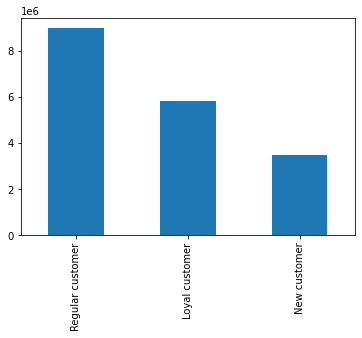

In [29]:
bar_loyalty = df['loyalty_flag'].value_counts().plot.bar()

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

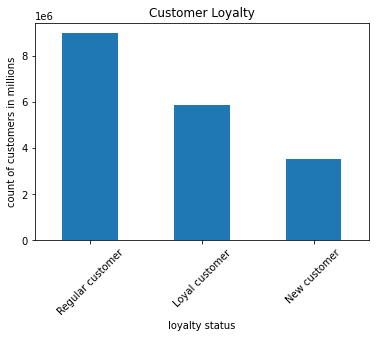

In [33]:
bar_loyalty2 = df['loyalty_flag'].value_counts().plot.bar()
plt.title('Customer Loyalty')
plt.ylabel('count of customers in millions')
plt.xlabel('loyalty status')
plt.xticks(rotation = 45)

## Line Charts & scatter plots

In [37]:
np.random.seed(4)

In [38]:
dev = np.random.rand(len(df)) <= 0.7

In [39]:
big = df[dev]

In [40]:
small = df[~dev]

In [41]:
len(df)

18339472

In [42]:
len(big) + len(small)

18339472

In [43]:
#Creating a subset with order hours and prices
df_2 =small[['order_hour_of_day', 'prices']]

Text(0.5, 1.0, 'Order Price by Hour of the Day')

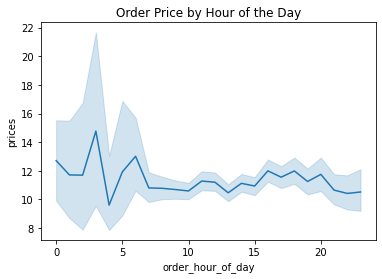

In [52]:
line_prices = sns.lineplot(data = df_2, x='order_hour_of_day', y = 'prices')
plt.title('Order Price by Hour of the Day')

In [45]:
#Creating a subset with age and number of dependants
df_3 = small[['Age', 'number_of_dependants']]

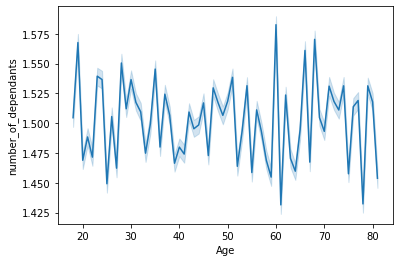

In [46]:
#step 6 checking relationship between age and dependants
line_age = sns.lineplot(data = df_3, x = 'Age',y = 'number_of_dependants')

Age and the number of dependants a person has seem unrelated from looking at the instacart data. The line chart shows the various differenes among customers and their family status.

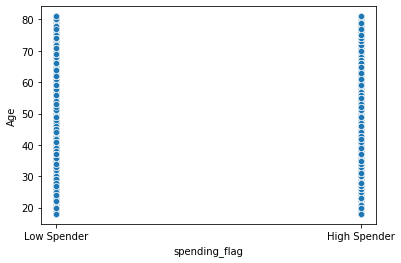

In [47]:
#Exploring the connection between age and spending power
spend_power_scatter = sns.scatterplot(x = 'spending_flag', y = 'Age',data = small)

There are high and low spenders in each age range. The scatterplot doesn't show any actionable trends. 

## Saving Charts

In [70]:
bar_loyalty2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'), bbox_inches = 'tight')

In [49]:
hours_histogram2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hours_histogram.png'))

In [53]:
line_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hours_linechart.png'))